In [1]:
import tensorflow as tf
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob
from skimage.color import rgb2lab, lab2rgb

In [26]:
train_images = glob.glob('data/images/Train/*.jpg')
test_images = glob.glob('data/images/Test/*.jpg')

In [30]:
print('Train Images: {}'.format(len(train_images)))
print('Test Images: {}'.format(len(test_images)))

Train Images: 8396
Test Images: 396


# Visualize images
- Take a peek on what the data looks like, train and test

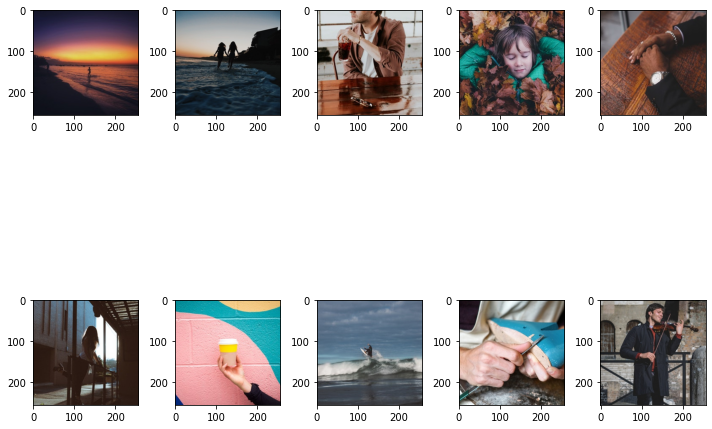

In [35]:
plt.figure(figsize=(10, 10))
row, column, count = 2, 5, 0
for rand_train in np.random.choice(train_images, size=10):
    img = cv2.imread(rand_train)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    count += 1
    plt.subplot(row, column, count)
    plt.imshow(img)
    
plt.tight_layout()

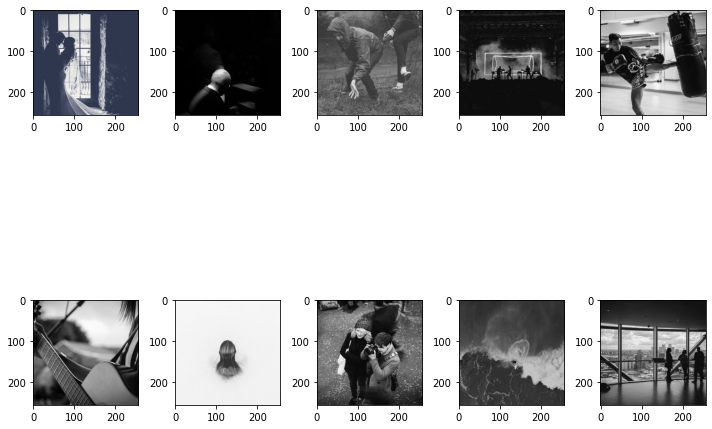

In [37]:
plt.figure(figsize=(10, 10))
row, column, count = 2, 5, 0
for rand_test in np.random.choice(test_images, size=10):
    img = cv2.imread(rand_test)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    count += 1
    plt.subplot(row, column, count)
    plt.imshow(img)
    
plt.tight_layout()

# Lets visualize lab color space
- Lab is the color space where we will train most of our images to map black and white images
- Since there's no such dataset for image coloring, other than taking an existing dataset then converting to Lab to be used

- A neural network learns to map its input to its output
- In our case we want to color an image, using the Lab Color space we can do that
- Our input (L, gray image), will learn to map to a(green-red color spectrum), b(blue-yellow color spectrum) as our output

In [62]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        if name == 'L':
            plt.imshow(image, cmap='gray')
        else:
            plt.imshow(image)
    plt.show()

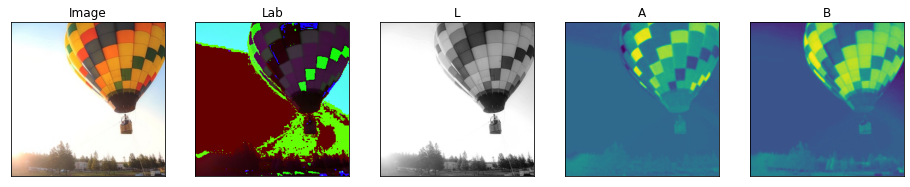

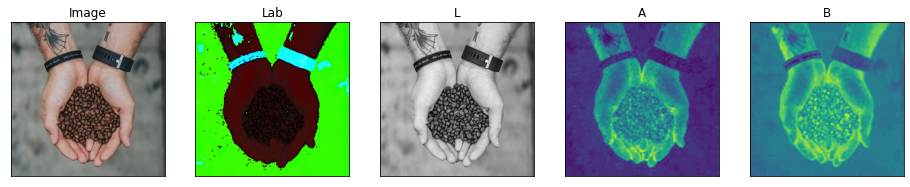

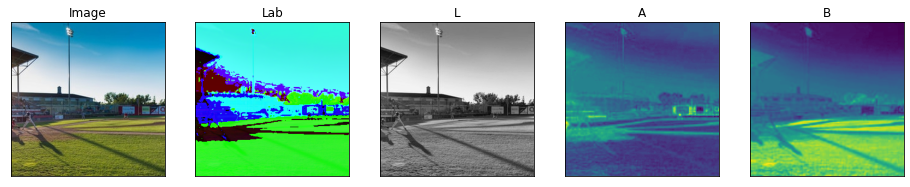

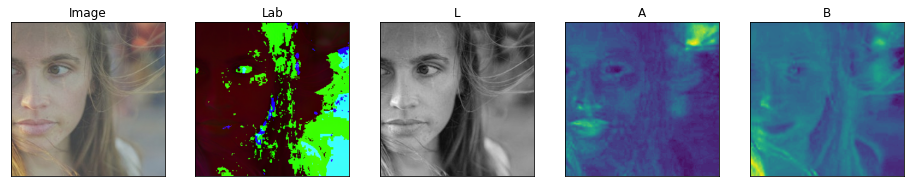

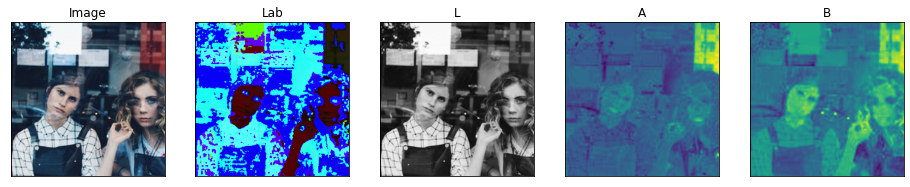

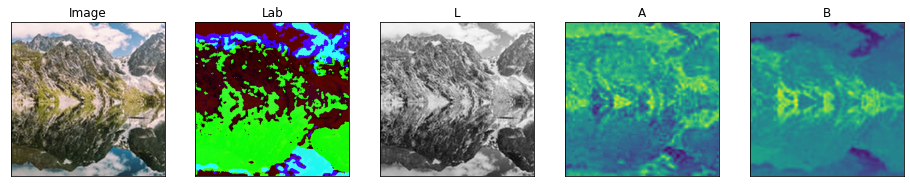

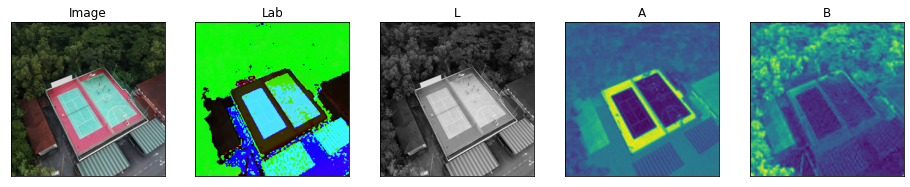

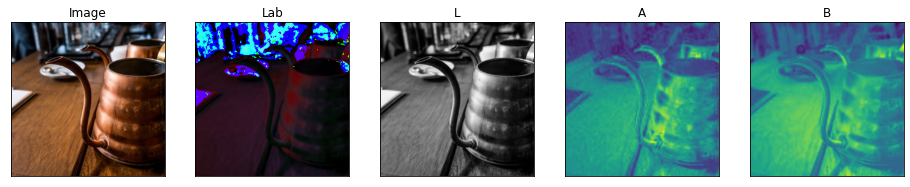

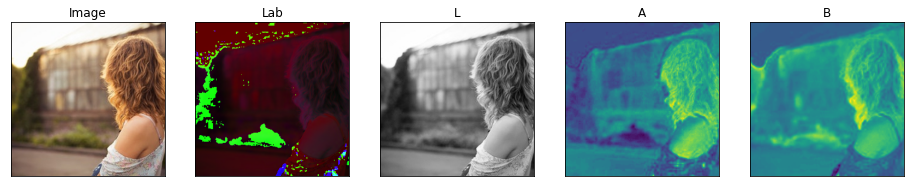

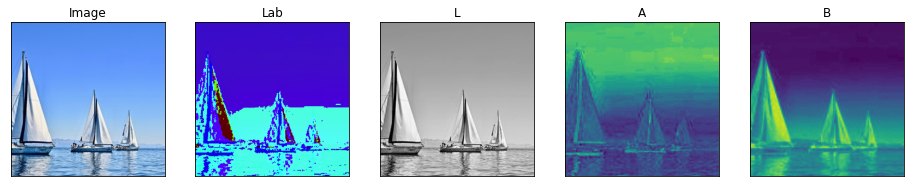

In [64]:
for rand_train in np.random.choice(train_images, size=10):
    img = cv2.imread(rand_train)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    lab_img = rgb2lab(img / 255.) # Normalize to 0 - 1, expected input is as such

    visualize(
        image=img, lab=lab_img.astype(np.uint8), 
        L=lab_img[:,:, 0], a=lab_img[:,:, 1], b=lab_img[:,:, 2]
    )